# Importing modules and dataset

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)


df = pd.read_csv('../data/preprocessed_data.csv')

# Splitting

In [15]:
from model.utils import train_test_split

X = df.drop('RainTomorrow', axis=1).values
y = df['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

# Training

In [16]:
from model.logistic_regression import LogisticRegression

model = LogisticRegression(lr=0.1, n_iters=1000)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluation

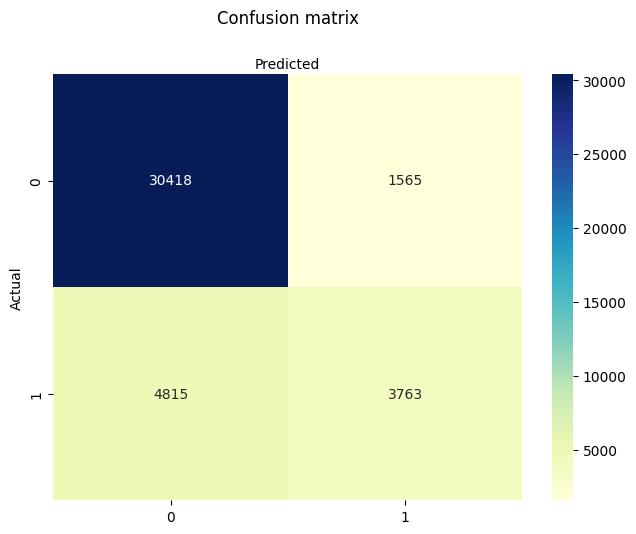

In [17]:
from model.metrics import ConfusionMatrix

cf = ConfusionMatrix(y_test, y_pred)
cf.print()

In [18]:
from model.metrics import Metrics

accuracy = Metrics.accuracy(cf)
precission = Metrics.precission(cf)
recall = Metrics.recall(cf)
f1 = Metrics.f1(cf)


print('\t precission \t recall \t f1')
print(f'0:\t {precission[0]:.2f} \t\t {recall[0]:.2f} \t\t {f1[0]:.2f}')
print(f'1:\t {precission[1]:.2f} \t\t {recall[1]:.2f} \t\t {f1[1]:.2f}')
print(f'\nAccuracy: {accuracy}')


	 precission 	 recall 	 f1
0:	 0.86 		 0.95 		 0.91
1:	 0.71 		 0.44 		 0.54

Accuracy: 0.8427060476812702


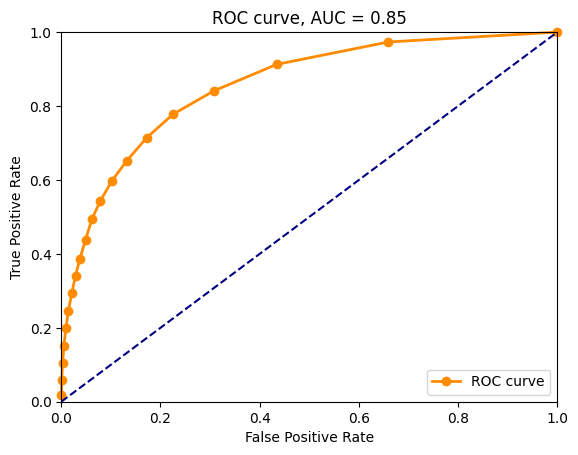

In [19]:
tpr_ar, fpr_ar = Metrics.roc(y_test, model.predict_prob(X_test))
auc = Metrics.auc(tpr_ar, fpr_ar)

plt.plot(fpr_ar, tpr_ar, marker='o', color='darkorange', lw = 2, label='ROC curve', clip_on=False)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve, AUC = %.2f'%auc)
plt.legend(loc="lower right")
plt.show()

# Apply SMOTE+ENN and evaluate again

In [20]:
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN()
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=2)

# Repeat the rest

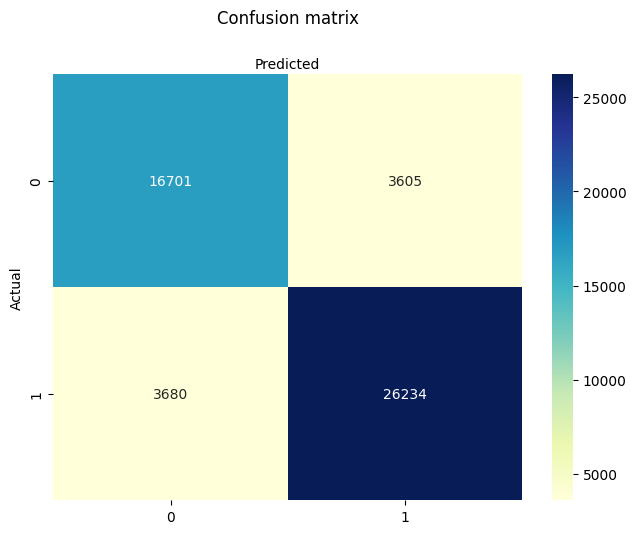

In [21]:
# Training
model = LogisticRegression(lr=0.1, n_iters=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
cf = ConfusionMatrix(y_test, y_pred)
cf.print()

In [22]:
accuracy = Metrics.accuracy(cf)
precission = Metrics.precission(cf)
recall = Metrics.recall(cf)
f1 = Metrics.f1(cf)

print('\t precission \t recall \t f1')
print(f'0:\t {precission[0]:.2f} \t\t {recall[0]:.2f} \t\t {f1[0]:.2f}')
print(f'1:\t {precission[1]:.2f} \t\t {recall[1]:.2f} \t\t {f1[1]:.2f}')
print(f'\nAccuracy: {accuracy}')

	 precission 	 recall 	 f1
0:	 0.82 		 0.82 		 0.82
1:	 0.88 		 0.88 		 0.88

Accuracy: 0.8549382716049383


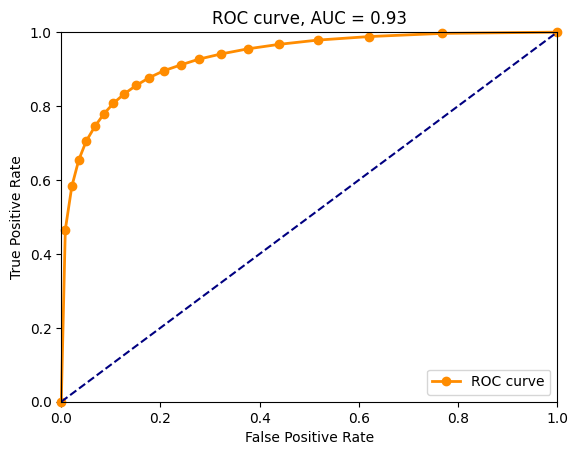

In [23]:
tpr_ar, fpr_ar = Metrics.roc(y_test, model.predict_prob(X_test))
auc = Metrics.auc(tpr_ar, fpr_ar)

fpr_ar.append(0)
tpr_ar.append(0)

plt.plot(fpr_ar, tpr_ar, marker='o', color='darkorange', lw = 2, label='ROC curve', clip_on=False)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve, AUC = %.2f'%auc)
plt.legend(loc="lower right")
plt.show()

# Exporting the model

In [24]:
import pickle

pickle.dump(model, open('../pkl/model.pkl', 'wb'))